# 🧪 Lab Handout: K-Means Clustering


In this lab, we will explore **K-Means Clustering**, an unsupervised learning algorithm used to group data into clusters.  
We will use a sample dataset (`income.csv`) and visualize the results using scatter plots.

---

**Learning Objectives**:
- Understand the steps of K-Means clustering
- Implement K-Means using `scikit-learn`
- Visualize clusters with Matplotlib / seaborn
- Use the **Elbow Method** and **Silhouette Score** to find the optimal `k`


# 🧩 K-Means Clustering

**K-means clustering** is a method to group data into clusters where each piece of data is closest to the central point, or **centroid**, of its cluster.

### Steps of the K-Means Algorithm
1. Start with **K centroids** by putting them at random places.  
   Example: here K = 2 (randomly selected centroids).  
2. Compute the **distance** of every point from each centroid and cluster them accordingly.  
3. Adjust centroids so that they become the **center of gravity** for their respective clusters.  
4. Re-cluster every point based on their updated distance from the centroids.  
5. Again, adjust centroids.  
6. Repeat steps until **data points stop changing clusters** (convergence).

---

### 🧮 **SSE** – Sum of Squared Errors or **WCSS** - Within Clusters Sum of Square
To find the **optimal number of clusters (K)** using SSE:
- Plot the **sum of squared distances** from each data point to its cluster’s centroid.  
- Then, select **K** where the decrease in SSE starts to **level off**, known as the **“elbow point.”**


***

## Import Required Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

## Load Dataset

In [2]:
# Load the dataset
data = pd.read_csv("income.csv")

# Display first few rows
data.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


## Exploratory Data Analysis (EDA)

In [3]:
# Basic info
print(data.info())
print(data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Name       22 non-null     object
 1   Age        22 non-null     int64 
 2   Income($)  22 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 660.0+ bytes
None
             Age      Income($)
count  22.000000      22.000000
mean   34.818182   90431.818182
std     5.901060   43505.964412
min    26.000000   45000.000000
25%    29.000000   58500.000000
50%    36.500000   67500.000000
75%    39.750000  135250.000000
max    43.000000  162000.000000


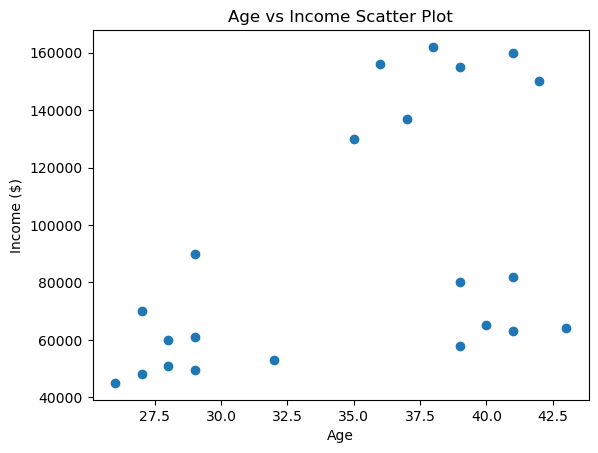

In [4]:
# Quick visualization
plt.scatter(data['Age'], data['Income($)'])
plt.xlabel("Age")
plt.ylabel("Income ($)")
plt.title("Age vs Income Scatter Plot")
plt.show()

## Apply K-Means Clustering

In [5]:
# Apply KMeans with 3 clusters (example)
km = KMeans(n_clusters=3, n_init='auto')
km.fit(data[["Age", "Income($)"]])
km.labels_



array([0, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0],
      dtype=int32)

In [6]:
data['Cluster'] = km.labels_
data.head()

,Name,Age,Income($),Cluster
0,Rob,27,70000,0
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


In [7]:
# scatter plot

<Axes: xlabel='Age', ylabel='Income($)'>

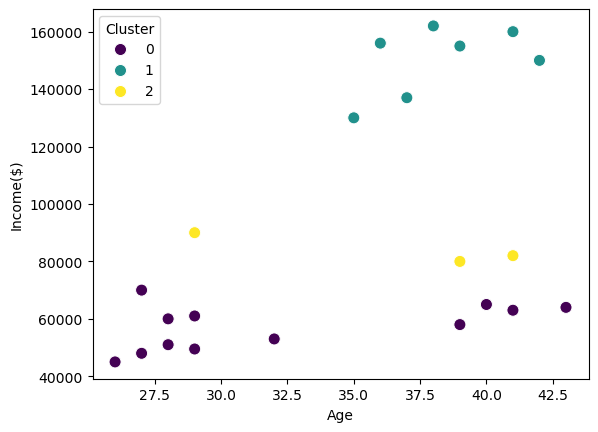

In [8]:
import seaborn as sns

sns.scatterplot(data, x='Age', y='Income($)',  palette='viridis', s=75, hue="Cluster")

When K-Means was applied on Age vs. Income data, the clusters looked incorrect because the features were on very different scales.
- Since Income had much larger values than Age, it dominated the distance calculations.
- To fix this, we need to scale the data (e.g., using **StandardScaler or MinMaxScaler**) so that all features contribute fairly to clustering.
  
**Conclusion**: Always consider **scaling** your data before applying K-Means or any distance-based algorithm.

### MinMax Scaling

Clusters are not formed properly. It can be due to Age and Income columns being on a different scale. We can try scaling them

In [12]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

data_scaled = pd.DataFrame(columns=['Age', 'Income($)'])

data_scaled[["Age", "Income($)"]] = scaler.fit_transform(data[["Age", "Income($)"]])
data_scaled.head()

,Age,Income($)
0,0.058824,0.213675
1,0.176471,0.384615
2,0.176471,0.136752
3,0.117647,0.128205
4,0.941176,0.897436


In [13]:
# Apply KMeans with 3 clusters

km = KMeans(n_clusters=3, n_init='auto')
km.fit(data_scaled[["Age", "Income($)"]])
data_scaled['cluster']= km.labels_

<Axes: xlabel='Age', ylabel='Income($)'>

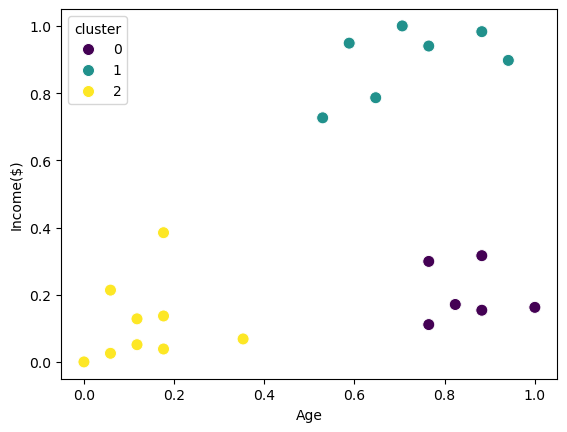

In [14]:
# scatter plot showing the clusters

import seaborn as sns

sns.scatterplot(data_scaled, x='Age', y='Income($)',  palette='viridis', s=75, hue="cluster")


In [15]:
km.inertia_

0.4750783498553096

In [22]:
centroids = km.cluster_centers_
centroids

array([[0.85294118, 0.2022792 ],
       [0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428]])

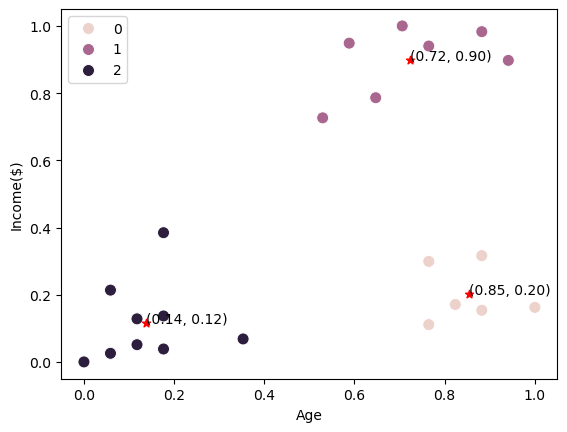

In [32]:
## show the k-Means centroids in scatter plot

sns.scatterplot(data_scaled, x='Age', y='Income($)', s=75, hue=km.labels_)
plt.scatter(centroids[:,0] , centroids[:,1], marker='*', c='red')

for i in range(len(centroids)):
    plt.text(centroids[i,0], centroids[i,1],
             f"({centroids[i,0]:.2f}, {centroids[i,1]:.2f})")

## Elbow method to determine optimal number of clusters

### 💪 Elbow Method

The **Elbow Method** helps determine the **optimal number of clusters (K)** in a K-Means model.  
It is based on analyzing the **Sum of Squared Errors (SSE)**, also known as **inertia** in scikit-learn.

---

#### **Concept**

- As K increases, the **SSE (inertia)** — i.e., the sum of squared distances of samples to their nearest cluster center — always **decreases**.  
- Initially, this reduction is large, but after a certain K, the improvement slows down.  
- The point where the **rate of decrease sharply changes** forms an **“elbow”** in the curve — this K is usually a good choice.

---

#### **Formula**

The **SSE** (or inertia) is given by:

$$
SSE = \sum_{i=1}^{k} \sum_{x_j \in C_i} \|x_j - \mu_i\|^2
$$

Where:  
- \( C_i \) = cluster *i*  
- \( \mu_i \) = centroid of cluster *i*  
- \( x_j \) = data points in cluster *i*

---

In [34]:
sse = [] # or WCSS

k_rng = range(1,10)

for k in k_rng:
    km = KMeans(n_clusters=k, n_init='auto')
    km.fit(data_scaled[["Age", "Income($)"]])
    sse.append(km.inertia_)
sse

[5.434011511988179,
 2.091136388699078,
 0.4750783498553096,
 0.36877340764405897,
 0.30713504184752916,
 0.23490439456561954,
 0.20420912829343021,
 0.1683439251478911,
 0.11190781744710708]

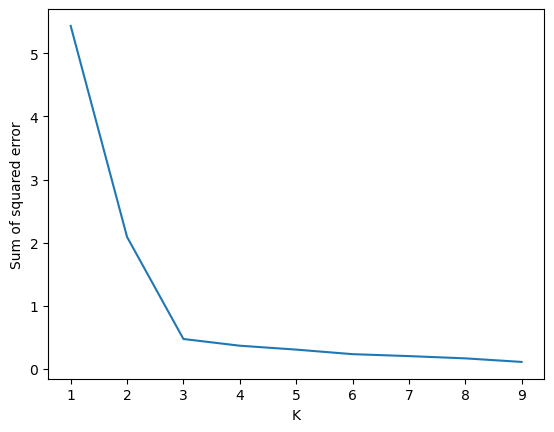

In [35]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)
plt.show()

The chart shows optimal number of clusters are 3

***

## Silhouette Score Method to determine optimal number of clusters

### 📏 Silhouette Score

The **Silhouette Score** is a metric that measures **how well data points fit within their clusters** in comparison to other clusters.  
It helps evaluate the **quality of clustering** without knowing the true labels.

---

#### **Formula**

For each sample **i**:
- **a(i)** = average distance between *i* and all other points in the same cluster.  
- **b(i)** = smallest average distance of *i* to all points in any other cluster.  

Then,  
$$
s(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))}
$$

The overall **silhouette score** is the average of all `s(i)` values.

---

#### **Score Range**

| Silhouette Score | Interpretation |
|------------------:|----------------|
| **+1** | Perfectly clustered (well-separated clusters). |
| **0** | Points are on or very close to the decision boundary. |
| **-1** | Points are likely assigned to the wrong cluster. |

---

In [37]:
## silhoutte score
from sklearn.metrics import silhouette_score

In [38]:
silhouette_coefficients=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(data_scaled)
    score=silhouette_score(data_scaled,kmeans.labels_)
    silhouette_coefficients.append(score)

In [39]:
silhouette_coefficients

[np.float64(0.6844518317257191),
 np.float64(0.8440849267382081),
 np.float64(0.69474181002955),
 np.float64(0.535440510036007),
 np.float64(0.36802410455767376),
 np.float64(0.25869074753378174),
 np.float64(0.2842964955977352),
 np.float64(0.30318425986221403),
 np.float64(0.30415702911649267)]

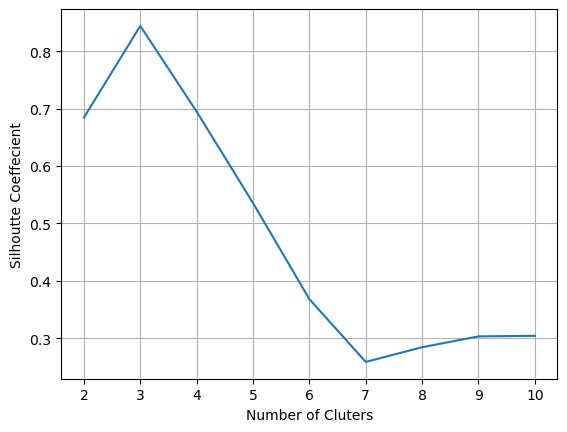

In [42]:
## plotting silhouette score
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of Cluters")
plt.ylabel("Silhoutte Coeffecient")
plt.grid(True)
plt.show()

##  Summary: [scikit-learn KMeans Reference](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)

### ⚙️ Key Parameters of `KMeans`

| Parameter | Description |
|------------|-------------|
| **n_clusters** | Number of clusters (K) to form. |
| **init** | Method for initializing centroids — `'k-means++'` *(default)* or `'random'`. |
| **n_init** | Number of times the algorithm runs with different centroid seeds (best result kept). |
| **max_iter** | Maximum number of iterations for a single run. |
| **random_state** | Controls random number generation for reproducibility. |
---

### 🧩 Main Methods

| Method | Description |
|---------|-------------|
| **fit(X)** | Compute K-Means clustering on dataset `X`. |
| **fit_predict(X)** | Fit model and return cluster labels for each data point. |
| **predict(X)** | Assign new samples to the nearest existing cluster centroid. |

---

### 📊 Important Attributes

| Attribute | Description |
|------------|-------------|
| **cluster_centers_** | Coordinates of the cluster centroids. |
| **labels_** | Index (0, 1, 2, …) of the cluster each data point belongs to. |
| **inertia_** | Sum of squared distances (SSE) of samples to their nearest centroid. |

---

📝 **Note:**  
- Always scale your data (e.g., using `StandardScaler`) before applying K-Means.  
- Choose an appropriate `K` using the **Elbow Method**.  
- K-Means assumes **spherical**, equally sized clusters and is sensitive to **outliers**.